# **<div align="center">Optimisation stochastique : TP3 - Overfitting et superparamétrisation</div>**

## **2. Random ReLU features**

**Q1 :**

Les fonctions $\phi(\cdot)$ sont des ReLU avec un retard $b_d$


**Q2 :**

La fonction $h$ est une combinaison linéaire de fonction $\phi_d$. Elle est donc affine par morceau. Les poids $w_d$ donnent les pentes de chacune des composant $\phi_d$.


**Q3 :**

La fonction $h$ est toujours affine par morceau, mais la représentation de son graphe se fait dans $\mathbb{R}^{P+1}$. Par exemple, si P = 2, on aura une surface avec des "cassures", et chacune de ses cassures sont la section d'un plan affine.

In [72]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Factory_kwargs
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.float32
factory_kwargs = {"device": device, "dtype": dtype}
print("device: ", device)

device:  cuda


In [73]:
# The function to learn
def f(x):
    return torch.abs(x) * torch.sin(2*2*torch.pi*x)

In [74]:
# Generate x values
N = 100
#x_values = torch.linspace(-1, 1, N, **factory_kwargs)
x_values = torch.unsqueeze(torch.linspace(-1, 1, N, **factory_kwargs), dim=1)

# Calculate y values using the function f(x)
y_values = f(x_values)

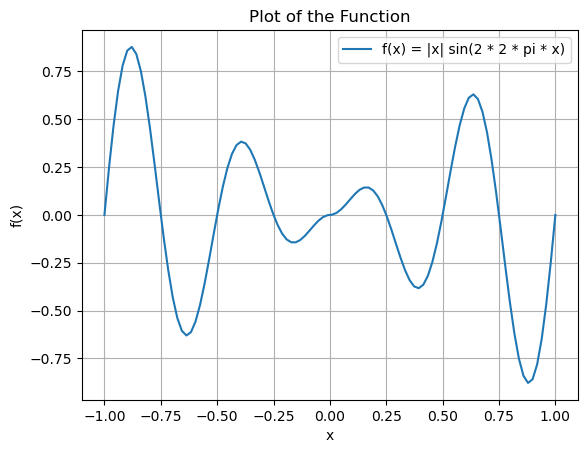

In [75]:
# Plot the function
plt.plot(x_values.cpu().numpy(), y_values.cpu().numpy(), label='f(x) = |x| sin(2 * 2 * pi * x)')
plt.title('Plot of the Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
# On construit en tenseur A de taillle 3x1 et B de taille 1x4

A = torch.tensor([[1.0], [2.0], [3.0]], **factory_kwargs)
B = torch.tensor([1.0, 2.0, 3.0, 4.0], **factory_kwargs)

C = A + B

print(C)

D = A[:,None] + B[None,:]

print(D)

tensor([[2., 3., 4., 5.],
        [3., 4., 5., 6.],
        [4., 5., 6., 7.]], device='cuda:0')
tensor([[[2., 3., 4., 5.]],

        [[3., 4., 5., 6.]],

        [[4., 5., 6., 7.]]], device='cuda:0')


In [77]:
class RandomReLU(nn.Module):
    def __init__(self, n_hidden = 10):
        super().__init__()

        self.b = 2 * (torch.rand(n_hidden) - 0.5).to(device)

        self.weight = torch.nn.Parameter(torch.zeros(n_hidden))

    def forward(self, x):
        dif = x - self.b[None,:]
        hidden = torch.maximum(dif, torch.zeros_like(dif))

        return torch.sum(self.weight[None,:] * hidden, dim=1)

In [78]:
model = RandomReLU(n_hidden=10).to(device)

In [79]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [80]:
from tqdm.auto import tqdm

  0%|          | 0/10000000 [00:00<?, ?it/s]

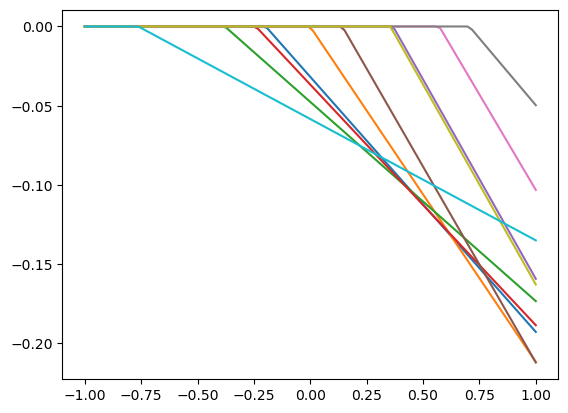

KeyboardInterrupt: 

In [82]:
num_train_iteration = 10000000
batch_size = 8
display_prediction_every = 1000
#image_size = 128
#sigma1 = 0.2
#sigma2 = 1.2
#sigma = image_size / 5


t = tqdm(range(num_train_iteration))
avg_loss = 0
loss_tracking = []

for i in t:
    #x, omega_1 = generate_data(batch_size, image_size, sigma1, sigma2, sigma, **factory_kwargs)
    #tirage_batch = torch.randint((0,N,batch_size))
    #
    
    # tirage_batch = torch.randint(0,N,(batch_size,1)).to(device)
    
    # Step 1: ...
    optimizer.zero_grad()

    # Step 2: ...
    #predicted_y_values = model(x_values[tirage_batch])

    predicted_y_values = model(x_values[:, None])

    # Step 3:...
    #loss = torch.mean((predicted_y_values - f(x_values[tirage_batch])) ** 2 )

    loss = torch.mean((predicted_y_values - f(x_values)) ** 2 )

    # Step 4:...
    loss.backward()

    # Step 5:...
    optimizer.step()

    # Tracking 
    avg_loss += loss.item()
    loss_tracking.append(avg_loss / (i + 1))
    t.set_description(f"Iteration: {i + 1}, Loss: {avg_loss / (i + 1):.4e}")

    """
    if (i + 1) % display_prediction_every == 0:
        # Turn off the gradient tracking for better performance
        # since we don't need to track the gradients for this step
        with torch.no_grad():
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))
            
            axes[0].imshow(x[0,0].detach().cpu().numpy())
            axes[0].set_title("Input image")

            axes[1].imshow(y_values[0,0].detach().cpu().numpy())
            axes[1].set_title("True mask")

            axes[2].imshow(predicted_y_falues[0,0].detach().cpu().numpy())
            axes[2].set_title("Predicted mask")
            plt.suptitle("Iteration: {}".format(i + 1))
            plt.show()
    """

    if i%1000 == 0:
        #plt.plot(x_values.cpu().numpy(), y_values.cpu().numpy(), label='f(x) = |x| sin(2 * 2 * pi * x)')
        plt.plot(x_values.cpu().detach().numpy(), predicted_y_values.cpu().detach().numpy(), label='f(x) = |x| sin(2 * 2 * pi * x)')
        plt.show()

In [61]:
x_values

tensor([-1.0000, -0.9798, -0.9596, -0.9394, -0.9192, -0.8990, -0.8788, -0.8586,
        -0.8384, -0.8182, -0.7980, -0.7778, -0.7576, -0.7374, -0.7172, -0.6970,
        -0.6768, -0.6566, -0.6364, -0.6162, -0.5960, -0.5758, -0.5556, -0.5354,
        -0.5152, -0.4949, -0.4747, -0.4545, -0.4343, -0.4141, -0.3939, -0.3737,
        -0.3535, -0.3333, -0.3131, -0.2929, -0.2727, -0.2525, -0.2323, -0.2121,
        -0.1919, -0.1717, -0.1515, -0.1313, -0.1111, -0.0909, -0.0707, -0.0505,
        -0.0303, -0.0101,  0.0101,  0.0303,  0.0505,  0.0707,  0.0909,  0.1111,
         0.1313,  0.1515,  0.1717,  0.1919,  0.2121,  0.2323,  0.2525,  0.2727,
         0.2929,  0.3131,  0.3333,  0.3535,  0.3737,  0.3939,  0.4141,  0.4343,
         0.4545,  0.4747,  0.4949,  0.5152,  0.5354,  0.5556,  0.5758,  0.5960,
         0.6162,  0.6364,  0.6566,  0.6768,  0.6970,  0.7172,  0.7374,  0.7576,
         0.7778,  0.7980,  0.8182,  0.8384,  0.8586,  0.8788,  0.8990,  0.9192,
         0.9394,  0.9596,  0.9798,  1.00